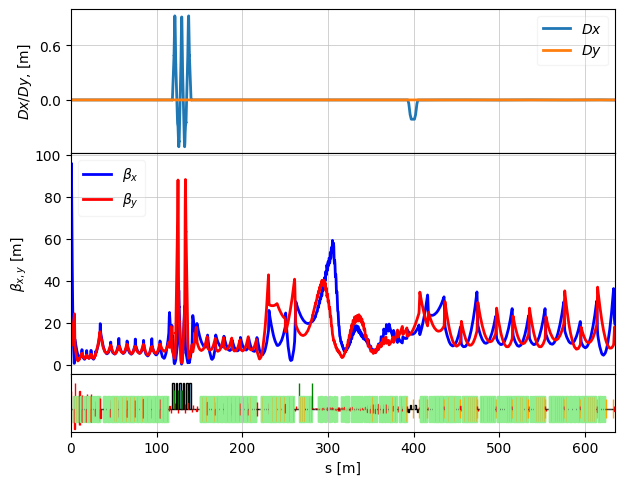

In [8]:

from ocelot import *

from ocelot.gui.accelerator import *

from rfglinacbte1 import *


import time

def misalign_lattice(lattice_list, sig_x, sig_y):
    for e in lattice_list:
        if e.__class__ == Quadrupole:
            e.dx  = np.random.randn() * sig_x
            e.dy  = np.random.randn() * sig_y

########################
########################



# merged drifts
D01 = Drift(eid="D01", l=0.203825)      # L0SPA1M + LSPA1M + L0PDA1M
D02 = Drift(eid="D02", l=0.11765)       # LPDA1M + L0PFA1M
D03 = Drift(eid="D03", l=1.3338359999999998)  # LPFA1M + L0PXA1M + LPXA1M + L0PYA1M + LPYA1M + LA1M03 + L0SCA1MS + LSCA1MS + LA1M05 + LA1M06 + L0SCA1M + LSCA1M + L0WSA1M + LWSA1M + LA1M07 + LA1M08 + GVA20 + LA1M09
D04 = Drift(eid="D04", l=0.2603352)     # L264 + L265 + L266 + L267
D05 = Drift(eid="D05", l=0.11765)       # L269 + L270
D06 = Drift(eid="D06", l=0.2258152)     # L273 + L274 + L276 + L277

# keep these as-is (nonzero/functional)
PDA1M = Quadrupole(eid="PDA1M", l=0.12235, k1=-9.100854778132883, tilt=0.0)
PFA1M = Quadrupole(eid="PFA1M", l=0.12235, k1=11.37239539280674, tilt=0.0)
PDA21 = Quadrupole(eid="PDA21", l=0.12235, k1=-13.230752203760584, tilt=0.0)
PFA21 = Quadrupole(eid="PFA21", l=0.12235, k1=16.896162067985998, tilt=0.0)

AKA21  = Cavity(eid="AKA21",  l=0.0349898,  freq=0.0,         v=-0.0,                 phi=0)
ACA21  = Cavity(eid="ACA21",  l=0.5598368,  freq=2856000000.0, v=0.009618212762114524, phi=0)
ACA212 = Cavity(eid="ACA212", l=1.3296124,  freq=2856000000.0, v=0.022843255310021994, phi=0)


bpm01 = Monitor()


# alignment errors


beamline = (PSECTA, L0SPA1M, SPA1M, LSPA1M, L0PDA1M, PDA1M, LPDA1M, L0PFA1M, PFA1M, LPFA1M, L0PXA1M, PXA1M, LPXA1M, L0PYA1M, PYA1M, LPYA1M, LA1M03, L0SCA1MS, SCA1MS, LSCA1MS, LA1M05, LA1M06, L0SCA1M, SCA1M, LSCA1M, L0WSA1M, WSA1M, LWSA1M, LA1M07, LA1M08, GVA20, LA1M09, AKA21, PACA21, ACA21, SXA21, SYA21, ACA212, PACA21, AKA21, L264, L265, SPA21, L266, L267, PPDA21, PDA21, L269, L270, PFA21, L273, L274, SCA21, L276, L277, AKA22, PACA22, ACA22, SXA22, SYA22, ACA222, PACA22, AKA22, L284, L285, LSPA22, L287, LQDA22, L289, LQFA22, L291, LQDA22, L293, L294, WMA22, L296, SCA22, L298, L299, AKA23, PACA23, ACA23, SXA23, SYA23, ACA232, PACA23, AKA23, L306, L307, SPA23, L309, QDA23, L311, QFA23, L313, QDA23, L315, L316, SCA23, L318, L319, AKA24, PACA24, ACA24, SXA24, SYA24, ACA242, PACA24, AKA24, L326, L327, SPA24, L329, PQDA24, QDA24, L331, QFA24, L333, QDA24, L335, L336, L337, L338, L339, WMA24, L341, CMA24, L343, SCA24, L345, GVA30, L347, AKA31, PACA31, ACA31, SXA31, SYA31, ACA312, PACA31, AKA31, L354, L355, L356, AKA32, PACA32, ACA32, SXA32, SYA32, ACA322, PACA32, AKA32, L363, L364, SPA32, L366, PQDA32, QDA32, L368, QFA32, L370, QDA32, L372, L373, WMA32, L375, SCA32, L377, L378, AKA33, PACA33, ACA33, SXA33, SYA33, ACA332, PACA33, AKA33, L385, L386, L387, AKA34, PACA34, ACA34, SXA34, SYA34, ACA342, PACA34, AKA34, L394, L395, SPA34, L397, QDA34, L399, QFA34, L401, QDA34, L403, L404, L405, L406, WMA34, L408, CMA34, L410, SCA34, L412, GVA40, L414, AKA41, PACA41, ACA41, SXA41, SYA41, ACA412, PACA41, AKA41, L421, L422, L423, AKA42, PACA42, ACA42, SXA42, SYA42, ACA422, PACA42, AKA42, L430, L431, SPA42, L433, QDA42, L435, QFA42, L437, QDA42, L439, L440, WMA42, L442, SCA42, L444, L445, AKA43, PACA43, ACA43, SXA43, SYA43, ACA432, PACA43, AKA43, L452, L453, L454, AKA44, PACA44, ACA44, SXA44, SYA44, ACA442, PACA44, AKA44, L461, GVA44, L463, L464, SPA44, L466, QDA44, L468, QFA44, L470, QDA44, L472, SCA441, L479, PXA44, L480, PYA44, L481, SCA442, L491, PSECTB, GVB10, L493, AKB11, PACB11, ACB11, SXB11, SYB11, ACB112, PACB11, AKB11, L500, L501, L502, AKB12, PACB12, ACB12, PACB12, AKB12, L506, L507, WMB12, L509, SCB12, L511, L512, AKB13, PACB13, ACB13, SXB13, SYB13, ACB132, PACB13, AKB13, L519, L520, L521, AKB14, PACB14, ACB14, PACB14, AKB14, L525, L526, SPB14, L528, L529, PQDB14, QDB14, L531, QFB14, L533, L534, L535, QDB14, L537, GVB20, L539, AKB21, PACB21, ACB21, SXB21, SYB21, ACB212, PACB21, AKB21, L546, L547, L548, AKB22, PACB22, ACB22, PACB22, AKB22, L552, L553, WMB22, L555, SCB22, L557, L558, AKB23, PACB23, ACB23, SXB23, SYB23, ACB232, PACB23, AKB23, L565, L566, L567, AKB24, PACB24, ACB24, PACB24, AKB24, L571, L572, SPB24, L574, L575, QDB24, L577, QFB24, L579, QDB24, L581, L582, L583, GVB30, L585, AKB31, PACB31, ACB31, SXB31, SYB31, ACB312, PACB31, AKB31, L592, L593, L594, AKB32, PACB32, ACB32, PACB32, AKB32, L598, L599, WMB32, L601, SCB32, L603, L604, AKB33, PACB33, ACB33, SXB33, SYB33, ACB332, PACB33, AKB33, L611, L612, L613, AKB34, PACB34, ACB34, PACB34, AKB34, L617, L618, SPB34, L620, L621, QDB34, L623, QFB34, L625, L626, L627, QDB34, L629, GVB40, L631, AKB41, PACB41, ACB41, SXB41, SYB41, ACB412, PACB41, AKB41, L638, L639, L640, AKB42, PACB42, ACB42, PACB42, AKB42, L644, L645, WMB42, L647, SCB42, L649, L650, AKB43, PACB43, ACB43, SXB43, SYB43, ACB432, PACB43, AKB43, L657, L658, L659, AKB44, PACB44, ACB44, PACB44, AKB44, L663, L664, SPB44, L666, L667, QDB44, L669, QFB44, L671, L672, L673, QDB44, L675, GVB50, L677, AKB51, PACB51, ACB51, SXB51, SYB51, ACB512, PACB51, AKB51, L684, L685, L686, AKB52, PACB52, ACB52, PACB52, AKB52, L690, L691, WMB52, L693, SCB52, L695, L696, AKB53, PACB53, ACB53, SXB53, SYB53, ACB532, PACB53, AKB53, L703, L704, L705, AKB54, PACB54, ACB54, PACB54, AKB54, L709, L710, SPB54, L712, L713, QDB54, L715, QFB54, L717, L718, L719, QDB54, L721, GVB60, L723, AKB61, PACB61, ACB61, SXB61, SYB61, ACB612, PACB61, AKB61, L730, L731, L732, AKB62, PACB62, ACB62, PACB62, AKB62, L736, L737, WMB62, L739, SCB62, L741, L742, AKB63, PACB63, ACB63, SXB63, SYB63, ACB632, PACB63, AKB63, L749, L750, L751, AKB64, PACB64, ACB64, PACB64, AKB64, L755, L756, SPB64, L758, L759, QDB64, L761, QFB64, L763, L764, L765, QDB64, L767, GVB70, L769, AKB71, PACB71, ACB71, SXB71, SYB71, ACB712, PACB71, AKB71, L776, L777, L778, AKB72, PACB72, ACB72, PACB72, AKB72, L782, L783, WSB72, L785, L786, SCB72, L788, L789, AKB73, PACB73, ACB73, SXB73, SYB73, ACB732, PACB73, AKB73, L796, L797, L798, AKB74, PACB74, ACB74, PACB74, AKB74, L802, L803, SPB74, L805, L806, QDB74, L808, QFB74, L810, L811, L812, QDB74, L814, L815, WSB74, L817, GVB80, L819, AKB81, PACB81, ACB81, SXB81, SYB81, ACB812, PACB81, AKB81, L826, L827, L828, AKB82, PACB82, ACB82, PACB82, AKB82, L832, L833, WSB82, L835, L836, SCB82, L838, L839, AKB83, PACB83, ACB83, SXB83, SYB83, ACB832, PACB83, AKB83, L846, L847, L848, AKB84, PACB84, ACB84, PACB84, AKB84, L852, GVB84, L854, L855, PSECTJ, PJARCM1, WSR001, LL857, LL858, JPXR001, PXR001, LL860, JPYR001, PYR001, LL862, LL863, LL864, LL865, SPR001, LL867, JQDR001, PDR001, LL869, LL870, WMR001, LL872, CMR001, JQFR002, PFR001, LL874, SCR001, LL876, FYR002, LL877, LL878, LL8791, JPXR002, PXR002, LL8792, JPYR002, PYR002, LL8793, SPR002, LL881, LL883, LL884, WDR002, PDR002, LL886, JQDR003, PFR002, LL888, LL889, SCR002, LL891, LL892, LL893, PJARC, BSR01, SRR011, DEL16, JBMR01S, BMR01, JBMR01E, DEL16, BSR01, SRR012, LL899, BSR01, L901, L902, JSFR013, SFR013, L904, L905, SCR014, L907, L908, SPR014, L910, JQFR014, QFR014, L912, L913, SLR014, L915, L916, L917, DEL25, JBMR02S, BMR02, JBMR02E, DEL25, BSR02, L920, L921, JSFR021, SFR021, L923, L924, SPR022, L926, JQDR022, QDR022, L928, L929, SCR022, L931, L932, JQFR023, QFR023, L934, L935, BYR023, L937, L938, DEL25, JBMR03S, BMR03, JBMR03E, DEL25, BSR03, L941, L942, WMR03, L944, L945, S8R031, L947, JSDR031, SDR031, L949, L950, SCR031, L952, L953, SPR032, L955, LCR1, LCR3, JQFR032, QFR032, PMIDJARC, LCR2, L957, L958, L959, WSR032, L961, L962, L963, JSDR033, SDR033, L965, L966, DEL25, JBMR04S, BMR04, JBMR04E, DEL25, BSR04, L969, L970, BYR041, L972, L973, JQFR041, QFR041, L975, L976, SCR041, L978, L979, SPR042, L981, JQDR042, QDR042, L983, L984, JSFR043, SFR043, L986, L987, DEL25, JBMR05S, BMR05, JBMR05E, DEL25, BSR05, L990, L991, SLR051, L993, L994, L995, WSR051, L997, L998, SPR051, LL1000, JQFR051, QFR051, LL1002, LL1003, SCR051, LL1005, LL1006, JSFR052, SFR052, LL1008, LL1009, LL1010, BSR06, SRR06, DEL16, JBMR06S, BMR06, JBMR06E, DEL16, BSR06, PJARCM2, LL1015, LL1016, LL1018, LL1019, LL10211, JPXR061, PXR061, LL10212, JPYR061, PYR061, LL10213, SPR061, LL1022, JQDR061, PDR061, LL1024, LL1025, LL1027, JQFR062, PFR061, LL1029, SCR061, LL1030, GVR061, LL1032, LL1033, LL1034, WMR063, LL1036, CMR063, LL1038, LL1040, LL1041, SPR063, LL1043, JQDR063, PDR063, LL1045, PFR063, LL1046, SCR063, LL1047, WSR063, LL10472, JPXR063, LL1048, JPYR063, LL1050, LL1051, LL1053, LL1054, LL1055, LL1056, SCR064, OTR064, LL1059, PXR063, LL1060, PYR063, LL1061, LL1062, LL1063, GVC10, LL1065, PSECTC, AKC11, PACC11, ACC11, SXC11, SYC11, ACC112, PACC11, AKC11, LL1072, LL1073, LL1074, AKC12, PACC12, ACC12, PACC12, AKC12, LL1078, LL1079, WSC12, LL1081, LL1082, WMC12, LL1084, CMC12, LL1086, SCC12, LL1088, LL1089, LL1090, AKC13, PACC13, ACC13, SXC13, SYC13, ACC132, PACC13, AKC13, LL1097, LL1098, LL1099, AKC14, PACC14, ACC14, PACC14, AKC14, LL1103, LL1104, WSC14, LL1106, LL1107, SPC14, LL1109, LL1110, PQDC14, QDC14, LL1112, LL1113, LL1114, QFC14, PQFC14, LL1116, GVC20, LL1118, AKC21, PACC21, ACC21, SXC21, SYC21, ACC212, PACC21, AKC21, LL1125, LL1126, LL1127, AKC22, PACC22, ACC22, PACC22, AKC22, LL1131, LL1132, WMC22, LL1134, CMC22, LL1136, SCC22, LL1138, LL1139, WSC22, LL1141, LL1142, LL1143, AKC23, PACC23, ACC23, SXC23, SYC23, ACC232, PACC23, AKC23, LL1150, LL1151, LL1152, AKC24, PACC24, ACC24, PACC24, AKC24, LL1156, LL1157, SPC24, LL1159, LL1160, PQDC24, QDC24, LL1162, QFC24, LL1164, LL1165, LL1166, GVC30, LL1168, AKC31, PACC31, ACC31, SXC31, SYC31, ACC312, PACC31, AKC31, LL1175, LL1176, LL1177, AKC32, PACC32, ACC32, PACC32, AKC32, LL1181, LL1182, WMC32, LL1184, CMC32, LL1186, SCC32, LL1188, LL1189, WDC32, LL1191, LL1192, AKC33, PACC33, ACC33, SXC33, SYC33, ACC332, PACC33, AKC33, LL1199, LL1200, LL1201, AKC34, PACC34, ACC34, PACC34, AKC34, LL1205, LL1206, SPC34, LL1208, LL1209, PQDC34, QDC34, LL1211, QFC34, PQFC34, LL1213, LL1214, LL1215, GVC40, LL1217, AKC41, PACC41, ACC41, SXC41, SYC41, ACC412, PACC41, AKC41, LL1224, LL1225, LL1226, AKC42, PACC42, ACC42, PACC42, AKC42, LL1230, LL1231, WMC42, LL1233, CMC42, LL1235, SCC42, LL1237, LL1238, LL1239, AKC43, PACC43, ACC43, SXC43, SYC43, ACC432, PACC43, AKC43, LL1246, LL1247, LL1248, AKC44, PACC44, ACC44, PACC44, AKC44, LL1252, LL1253, SPC44, LL1255, LL1256, QDC44, LL1258, QFC44, LL1260, LL1261, LL1262, LL1263, GVC50, LL1265, AKC51, PACC51, ACC51, BXC51, BYC51, ACC512, PACC51, AKC51, LL1272, LL1273, LL1274, AKC52, PACC52, ACC52, PACC52, AKC52, LL1278, LL1279, WMC52, LL1281, CMC52, LL1283, SCC52, LL1285, LL1286, LL1287, AKC53, PACC53, ACC53, SXC53, SYC53, ACC532, PACC53, AKC53, LL1294, LL1295, LL1296, AKC54, PACC54, ACC54, PACC54, AKC54, LL1300, LL1301, LL1302, SPC54, LL1304, LL1305, QDC54, LL1307, QFC54, LL1309, LL1310, LL1311, GVC60, LL1313, AKC61, PACC61, ACC61, SXC61, SYC61, ACC612, PACC61, AKC61, LL1320, AKC62, PACC62, ACC62, PACC62, AKC62, LL1324, LL1325, LL1326, WMC62, LL1328, CMC62, LL1330, SCC62, LL1332, LL1333, LL1334, AKC63, PACC63, ACC63, SXC63, SYC63, ACC632, PACC63, AKC63, LL1341, AKC64, PACC64, ACC64, PACC64, AKC64, LL1345, LL1346, LL1347, SPC64, LL1349, LL1350, QDC64, LL1352, LL1353, LL1354, QFC64, LL1356, GVC64, LL1358, AKC71, PACC71, ACC71, SXC71, SYC71, ACC712, PACC71, AKC71, LL1365, AKC72, PACC72, ACC72, PACC72, AKC72, LL1369, LL1370, LL1371, WMC72, LL1373, CMC72, LL1375, SCC72, LL1377, LL1378, LL1379, AKC73, PACC73, ACC73, PACC73, AKC73, LL1383, AKC74, PACC74, ACC74, BXC74, BYC74, ACC742, PACC74, AKC74, LL1390, LL1391, LL1392, SPC74, LL1394, LL1395, QDC74, LL1397, LL1398, LL1399, QFC74, LL1401, PXC74, LL1402, PYC74, LL1403, LAC81, AKC81, PACC81, ACC81, SXC81, SYC81, ACC812, PACC81, AKC81, LAC4MM, AKC82, PACC82, ACC82, PACC82, AKC82, LAC82, LL1500, LQDC82, LL1502, LQFC82, SCC82, LL1504, LL1505, AKC83, PACC83, ACC83, ACC832, PACC83, AKC83, LL1512, AKC84, PACC84, ACC84, PACC84, AKC84, LL1516, LL1517, LL1518, SPC84, LL1520, LL1521, QDC84, LL1523, QFC84, LL1525, LL1526, LL1527, LL1528, GV110, LL1530, PSECT1, AK111, PAC111, AC111, SX111, SY111, AC1112, PAC111, AK111, LL1537, AK112, PAC112, AC112, PAC112, AK112, LL1541, LL1542, LL1543, WM112, LL1545, CM112, LL1547, SC112, LL1549, LL1550, LL1551, AK113, PAC113, AC113, SX113, SY113, AC1132, PAC113, AK113, LL1558, AK114, PAC114, AC114, PAC114, AK114, LL1562, LL1563, LL1564, SP114, LL1566, LL1567, PQD114, QD114, LL1569, QF114, PQF114, LL1571, LL1572, LL1573, LL1574, LL1575, AK121, PAC121, AC121, SX121, SY121, AC1212, PAC121, AK121, LL1582, AK122, PAC122, AC122, PAC122, AK122, LL1586, LL1587, LL1588, WM122, LL1590, CM122, LL1592, SC122, LL1594, LL1595, PY122, LL1596, AK123, PAC123, AC123, SX123, SY123, AC1232, PAC123, AK123, LL1603, AK124, PAC124, AC124, PAC124, AK124, LL1607, LL1608, LL1609, SP124, LL1611, LL1612, QD124, LL1614, QF124, LL1616, LL1617, LL1618, GV130, LL1620, F0, DS13R1, D0AC131, PAC131, AC1311, BX131, BY131, AC1312, PAC131, D1AC131, DSD1AC131, D0AC132, PAC132, AC132, PAC132, D1AC132, DSD1AC132, PX132, DSPX132, D0AC133, PAC133, AC1331, AC1332, PAC133, D1AC133, DSD1AC133, D0AC134, PAC134, AC134, PAC134, D1AC134, DSD1AC134, GV134, L1351, PD135, L1352, DSPD135, D0SP135, SP135, DSSP135, LQD135, DSQD135, LQF135, DSQF135, PF135, DSPF135, PX1352, DSPX1352, PX135, DSPX135, BX135, DSBX135, BY135, DSBY135, GV15T, DSGV15T, PY135, DSPY135, D0SP15T, SP15T, DSSP15T, D0SC15T, SC15T, D1SC15T, DSD1SC15T, PTARGET, SSOLB, CL151, D0AC151, PAC151, AC151, PAC151, D1AC151, DSD1AC151, SP1515, SX1515, D0AC152, PAC152, AC152, PAC152, D1AC152, DSD1AC152, D0AC161, PAC161, AC161, PAC161, D1AC161, DSD1AC161, SP1615, SY1615, D0AC162, PAC162, AC162, PAC162, D1AC162, DSD1AC162, D0AC163, PAC163, AC163, PAC163, D1AC163, DSD1AC163, D0AC164, PAC164, AC164, PAC164, D1AC164, SSOLE, P16SOLEND, GV164, D0SC164, SC164, D1SC164, DSD1SC164, QF1641, DSQF1641, QD1642, DSQD1642, QF1643, DSQF1643, QD1644, DSQD1644, BM16C1, DSBM16C1, BM16C2, DSBM16C2, BM16C3, DSBM16C3, BM16C4, DSBM16C4, QD1651, DSQD1651, QF1652, DSQF1652, QD1653, DSQD1653, QF1654, DSQF1654, D0SC165, SC165, D1SC165, CL1655, DSCL1655, QD1655, DSQD1655, LPX1651, PX165, LPX1652, DSPX165, QF1656, DSQF1656, LPY1651, PY165, LPY1652, DSPY165, D0SP165, SP165, DSSP165, QD1657, DSQD1657, CL1658, D0AC171, PAC171, AC1711, QF1711, AC1712, QD1712, AC1713, QF1713, AC1714, PAC171, D1AC171, DSD1AC171, QD1714, DSQD1714, D0AC172, PAC172, AC1721, QF1721, AC1722, QD1722, AC1723, QF1723, AC1724, PAC172, D1AC172, D0SP172, SP172, DSSP172, QD1724, DSQD1724, PX172, DSPX172, PY172, DSPY172, QF1725, DSQF1725, D0AC173, PAC173, AC1731, QD1731, AC1732, QF1732, AC1733, QD1733, AC1734, PAC173, D1AC173, DSD1AC173, QF1734, DSQF1734, D0AC174, PAC174, AC1741, QD1741, AC1742, QF1742, AC1743, QD1743, AC1744, PAC174, D1AC174, D0SC174, SC174, D1SC174, D0SP1744, SP1744, DSSP1744, QF1744, DSQF1744, PX174, DSPX174, QD1745, DSQD1745, PY174, DSPY174, QF1746, DSQF1746, GV180, DSGV180, D0AC181, PAC181, AC1811, QD1811, AC1812, QF1812, AC1813, QD1813, AC1814, PAC181, D1AC181, DSD1AC181, QF1814, DSQF1814, D0AC182, PAC182, AC1821, QD1821, AC1822, QF1822, AC1823, QD1823, AC1824, PAC182, D1AC182, D0SP182, SP182, DSSP182, QF1824, DSQF1824, PX182, DSPX182, PY182, DSPY182, PD1825, DSQD1825, D0AC183, PAC183, AC1831, QF1831, AC1832, QD1832, AC1833, QF1833, AC1834, PAC183, D1AC183, DSD1AC183, QD1834, DSQD1834, D0AC184, PAC184, AC1841, QF1841, AC1842, QD1842, AC1843, QF1843, AC1844, PAC184, D1AC184, DSD1AC184, GV210, DSGV210, QD1844, DSQD1844, CL1844, DSCL1844, QF1845, DSQF1845, PY184, DSPY184, QD1846, DSQD1846, CL1846, DSCL1846, SP1847, DSCL18462, QF1847, DSQF1847, PX184, DSPX184, QD1848, DSQD1848, CL1848, D0SP1849, DSSP1849, PF1849, DSQF1849, D0SC184, SC184, D1SC184, PSECT2, D0AC211, PAC211, AC2111, QD2111, AC2112, QF2112, AC2113, QD2113, AC2114, PAC211, D1AC211, DSD1AC211, QF2114, DSQF2114, D0AC212, PAC212, AC2121, QD2121, AC2122, QF2122, AC2123, QD2123, AC2124, PAC212, D1AC212, DSD1AC212, D0SP212, DSSP212, PF2124, DSQF2124, PX212, DSPX212, PY212, DSPY212, SP212, DSPY2122, QD2125, DSQD2125, D0AC213, PAC213, AC2131, QF2131, AC2132, QD2132, AC2133, QF2133, AC2134, PAC213, D1AC213, DSD1AC213, QD2134, DSQD2134, D0AC214, PAC214, AC2141, QF2141, AC2142, QD2142, AC2143, QF2143, AC2144, PAC214, D1AC214, D0SC214, SC214, D1SC214, D0SP214, SP214, DSSP214, QD2144, DSQD2144, PX214, DSPX214, QF2145, DSQF2145, PY214, DSPY214, QD2146, DSQD2146, GV220, D0AC221, PAC221, AC2211, QF2211, AC2212, QD2212, AC2213, PAC221, D1AC221, DSD1AC221, QF2213, DSQF2213, D0AC222, PAC222, AC2221, QD2221, AC2222, QF2222, AC2223, PAC222, D1AC222, D0SP222, SP222, DSSP222, QD2223, DSQD2223, D0AC223, PAC223, AC2231, QF2231, AC2232, QD2232, AC2233, PAC223, D1AC223, DSD1AC223, QF2233, DSQF2233, D0AC224, PAC224, AC2241, QD2241, AC2242, QF2242, AC2243, PAC224, D1AC224, D0WS224, WS224, D1WS224, DSD1WS224, PX224, DSPX224, D0SP224, SP224, DSSP224, QD2243, DSQD2243, PY224, DSPY224, GV230, D0AC231, PAC231, AC2311, QF2311, AC2312, QD2312, AC2313, PAC231, D1AC231, DSD1AC231, PF2313, DSQF2313, D0AC232, PAC232, AC2321, QD2321, AC2322, QF2322, AC2323, PAC232, D1AC232, D0SP232, SP232, DSSP232, QD2323, DSQD2323, D0AC233, PAC233, AC2331, QF2331, AC2332, QD2332, AC2333, PAC233, D1AC233, DSD1AC233, QF2333, DSQF2333, D0AC234, PAC234, AC2341, QD2341, AC2342, QF2342, AC2343, PAC234, D1AC234, D0SP234, SP234, DSSP234, D0QM2343, QD2343, D1QM2343, PX234, LQF2344, D2QM2343, QF2345, D3QM2343, DSD3QM2343, D0SC234, SC234, D1SC234, DSD1SC234, GV240, F00, D0AC241, PAC241, AC2411, SX241, PY241, AC2412, PAC241, D1AC241, D0SP241, SP241, DSSP241, D0QM241, QD241, D1QM241, LQF241, D2QM241, QF241, D3QM241, DSD3QM241, D0SC241, SC241, D1SC241, D0AC242, PAC242, AC2421, SX242, SY242, AC2422, PAC242, D1AC242, D0SP242, SP242, DSSP242, D0QM242, QD242, D1QM242, LQF242, D2QM242, QF242, D3QM242, DSD3QM242, D0WS242, WS242, D1WS242, D0AC243, PAC243, AC2431, SX243, SY243, AC2432, PAC243, D1AC243, D0SP243, SP243, DSSP243, D0QM243, QD243, D1QM243, LQF243, D2QM243, QF243, D3QM243, DSD3QM243, D0SC243, SC243, D1SC243, D0AC244, PAC244, AC244, PAC244, D1AC244, GV244, DSGV244, PX244, DSPX244, PY244, DSPY244, D0SP244, SP244, DSSP244, D0QM244, QD244, D1QM244, LQF244, D2QM244, QF244, D3QM244, DSD3QM244, D0SC244, SC244, D1SC244, D0AC261, PAC261, AC2611, PX261, SY261, AC2612, PAC261, D1AC261, D0SP261, SP261, DSSP261, D0QM261, QD261, D1QM261, LQF261, D2QM261, QF261, D3QM261, DSD3QM261, D0WS261, WS261, D1WS261, D0AC262, PAC262, AC2621, SX262, SY262, AC2622, PAC262, D1AC262, D0SP262, SP262, DSSP262, D0QM262, QD262, D1QM262, LQF262, D2QM262, QF262, D3QM262, DSD3QM262, D0SC262, SC262, D1SC262, D0AC263, PAC263, AC2631, SX263, SY263, AC2632, PAC263, D1AC263, D0SP263, SP263, DSSP263, D0QM263, QD263, D1QM263, LQF263, D2QM263, QF263, D3QM263, DSD3QM263, D0SC263, SC263, D1SC263, D0AC264, PAC264, AC2641, SX264, PY264, AC2642, PAC264, D1AC264, L264AD, D0SP264, SP264, DSSP264, D0QM264, QD264, D1QM264, LQF264, D2QM264, QF264, D3QM264, DSD3QM264, D0SC264, SC264, D1SC264, D0AC271, PAC271, AC2711, SX271, SY271, AC2712, PAC271, D1AC271, PAC272, AC272, PAC272, DSAC272, D0SP272, SP272, DSSP272, D0QM272, QD272, D1QM272, PX272, LQF272, D2QM272, QF272, D3QM272, DSD3QM272, D0WS272, WS272, D1WS272, D0AC273, PAC273, AC2731, SX273, SY273, AC2732, PAC273, D1AC273, PAC274, AC274, PAC274, DSAC274, D0SP274, SP274, DSSP274, D0QM274, QD274, D1QM274, LQF274, D2QM274, QF274, D3QM274, DSD3QM274, D0SC274, SC274, D1SC274, DSD1SC274, GV280, D0AC281, PAC281, AC2811, SX281, SY281, AC2812, PAC281, D1AC281, PAC282, AC282, PAC282, DSAC282, D0SP282, SP282, DSSP282, D0QM282, QD282, D1QM282, PY282, LQF282, D2QM282, QF282, D3QM282, DSD3QM282, D0SC282, SC282, D1SC282, D0AC283, PAC283, AC2831, SX283, SY283, AC2832, PAC283, D1AC283, PAC284, AC284, PAC284, DSAC284, GV284, D0SP284, SP284, DSSP284, D0QM284, QD284, D1QM284, LQF284, D2QM284, QF284, D3QM284, D0SC284, SC284, D1SC284, PEND2, PSY2, LSY21, JBC1E1S, BC1E, JBC1E1E, LE1, JBC2E1S, BC2E, JBC2E1E, LE21, LE22, SPDC2, LE21, JBC2E2S, mBC2E, JBC2E2E, LE1, JBC1E2S, mBC1E, JBC1E2E, LSY22, PSECT3, GVDC4, LL310, LSPD1, SPDC4, LSPD2, LDS1, PFDC4, LDS2, PXDC4, LDS3, PYDC4, LDS4, PDDC4, LDS5, LGV320, LA321, AK321, PAC321, AC321, SX321, SY321, AC3212, PAC321, AK321, LAC4MM, AK322, PAC322, AC322, PAC322, AK322, LA322, LL2654, LL2655, WM322, LL2657, CM322, LL2659, SC322, LL2661, LL2662, AK323, PAC323, AC323, SX323, SY323, AC3232, PAC323, AK323, LAC4MM, AK324, PAC324, AC324, PAC324, AK324, LA324, LFL324, LSPD1, SP324, LSPD2, LDS1, PF324, LDS2, PX324, LDS3, PY324, LDS4, PD324, LDS5, LDS324, GV330, LA331, AK331, PAC331, AC331, SX331, SY331, AC3312, PAC331, AK331, LAC4MM, AK332, PAC332, AC332, PAC332, AK332, LA332, LL2654, LL2655, WM332, LL2657, CM332, LL2659, SC332, LL2661, LL2662, LA333, AK333, PAC333, AC333, SX333, SY333, AC3332, PAC333, AK333, LAC4MM, AK334, PAC334, AC334, PAC334, AK334, LA334, LL2665, LA341, AK341, PAC341, AC341, SX341, SY341, AC3412, PAC341, AK341, LAC4MM, AK342, PAC342, AC342, PAC342, AK342, LA342, LL2699, LL2700, SC342, LL2702, LL2706, LL2707, LA343, AK343, PAC343, AC343, SX343, SY343, AC3432, PAC343, AK343, LAC4MM, AK344, PAC344, AC344, PAC344, AK344, LA344, LFL344, LSPD1, SP344, LSPD2, LDS1, PF344, LDS2, PX344, LDS3, PY344, LDS4, PD344, LDS5, LDS344, GV350, LA351, AK351, PAC351, AC351, SX351, SY351, AC3512, PAC351, AK351, LAC4MM, AK352, PAC352, AC352, PAC352, AK352, LA352, LL2745, LL2746, WS352, LL2748, CM352, LL2750, SC352, LL2752, LL2753, LA353, AK353, PAC353, AC353, SX353, SY353, AC3532, PAC353, AK353, LAC4MM, AK354, PAC354, AC354, PAC354, AK354, LA354, LL2766, LL2767, LL2768, LA361, AK361, PAC361, AC361, PAC361, AK361, LAC4MM, AK362, PAC362, AC362, PAC362, AK362, LA362, LL2778, WS362, LA363, AK363, PAC363, AC363, PAC363, AK363, LAC4MM, AK364, PAC364, AC364, PAC364, AK364, LA364, LFL364, LSPD1, SP364, LSPD2, LDS1, PF364, LDS2, PX364, LDS3, PY364, LDS4, PD364, LDS5, LDS364, GV370, LA371, AK371, PAC371, AC371, SX371, SY371, AC3712, PAC371, AK371, LAC4MM, AK372, PAC372, AC372, PAC372, AK372, LA372, LL2814, LL2815, WS372, LL2817, CM372, LL2819, SC372, LL2821, LL2822, LA373, AK373, PAC373, AC373, SX373, SY373, AC3732, PAC373, AK373, LAC4MM, AK374, PAC374, AC374, PAC374, AK374, LA374, LL2835, LL2836, LL2837, LA381, AK381, PAC381, AC381, PAC381, AK381, LAC4MM, AK382, PAC382, AC382, PAC382, AK382, LA382, LL2847, WS382, LA383, AK383, PAC383, AC383, PAC383, AK383, LAC4MM, AK384, PAC384, AC384, PAC384, AK384, LA384, LFL384, LSPD1, SP384, LSPD2, LDS1, PF384, LDS2, PX384, LDS3, PY384, LDS4, PD384, LDS5, LDS384, LL2870, GV384, LL2872, LL2874, LL2876, LL2877, LL2878, LL2879, LL2880, PSECT4, LA411, AK411, PAC411, AC411, PAC411, AK411, LAC4MM, AK412, PAC412, AC412, PAC412, AK412, LA412, LL2890, LL2891, WM412, LL2893, CM412, LL2895, SC412, LL2897, LL2898, LA413, AK413, PAC413, AC413, SX413, SY413, AC4132, PAC413, AK413, LAC4MM, AK414, PAC414, AC414, PAC414, AK414, LA414, LL2911, LL2912, LL2913, LA421, AK421, PAC421, AC421, PAC421, AK421, LAC4MM, AK422, PAC422, AC422, PAC422, AK422, LA422, LL2923, LA423, AK423, PAC423, AC423, PAC423, AK423, LAC4MM, AK424, PAC424, AC424, PAC424, AK424, LA424, LFL424, LSPD1, SP424, LSPD2, LDS1, PF424, LDS2, PX424, LDS3, PY424, LDS4, PD424, LDS5, LDS424, GV430, LA431, AK431, PAC431, AC431, SX431, SY431, AC4312, PAC431, AK431, LAC4MM, AK432, PAC432, AC432, PAC432, AK432, LA432, LL2959, LL2960, WM432, LL2962, CM432, LL2964, SC432, LL2966, LL2967, LA433, AK433, PAC433, AC433, SX433, SY433, AC4332, PAC433, AK433, LAC4MM, AK434, PAC434, AC434, PAC434, AK434, LA434, LL2980, LA441, AK441, PAC441, AC441, PAC441, AK441, LAC4MM, AK442, PAC442, AC442, PAC442, AK442, LA442, LL2991, LA443, AK443, PAC443, AC443, PAC443, AK443, LAC4MM, AK444, PAC444, AC444, PAC444, AK444, LA444, LFL444, LSPD1, SP444, LSPD2, LDS1, PF444, LDS2, PX444, LDS3, PY444, LDS4, PD444, LDS5, LDS444, GV450, LA451, AK451, PAC451, AC451, SX451, SY451, AC4512, PAC451, AK451, LAC4MM, AK452, PAC452, AC452, PAC452, AK452, LA452, LL3028, LL3029, WM452, LL3031, CM452, LL3033, SC452, LL3035, LL3036, LA453, AK453, PAC453, AC453, SX453, SY453, AC4532, PAC453, AK453, LAC4MM, AK454, PAC454, AC454, PAC454, AK454, LA454, LL3049, GV454, LL3051, LL3052, LL3053, LA461, AK461, PAC461, AC461, PAC461, AK461, LAC4MM, AK462, PAC462, AC462, PAC462, AK462, LA462, LL3063, LA463, AK463, PAC463, AC463, PAC463, AK463, LAC4MM, AK464, PAC464, AC464, PAC464, AK464, LA464, LFL464, LSPD1, SP464, LSPD2, LDS1, PF464, LDS2, PX464, LDS3, PY464, LDS4, PD464, LDS5, LDS464, GV470, LA471, AK471, PAC471, AC471, SX471, SY471, AC4712, PAC471, AK471, LAC4MM, AK472, PAC472, AC472, PAC472, AK472, LA472, LL3099, LL3100, WM472, LL3102, CM472, LL3104, SC472, LL3106, LL3107, LA473, AK473, PAC473, AC473, SX473, SY473, AC4732, PAC473, AK473, LAC4MM, AK474, PAC474, AC474, PAC474, AK474, LA474, LL3120, GV474, LL3122, LL3123, LL3124, LA481, AK481, PAC481, AC481, PAC481, AK481, LAC4MM, AK482, PAC482, AC482, PAC482, AK482, LA482, LL3134, LA483, AK483, PAC483, AC483, PAC483, AK483, LAC4MM, AK484, PAC484, AC484, PAC484, AK484, LA484, LFL484, LSPD1, SP484, LSPD2, LDS1, PF484, LDS2, PX484, LDS3, PY484, LDS4, PD484, LDS5, LDS484, LL3157, GV484, LL3159, LL3161, LL3163, LL3164, LL3165, LL3166, LL3167, PSECT5, LA511, AK511, PAC511, AC511, PAC511, AK511, LAC4MM, AK512, PAC512, AC512, PAC512, AK512, LA512, LL3177, LL3178, WS512, LL3180, LL3181, LL3182, SC512, LL3184, LL3185, LA513, AK513, PAC513, AC513, SX513, SY513, AC5132, PAC513, AK513, LAC4MM, AK514, PAC514, AC514, PAC514, AK514, LA514, LL3200, LA521, AK521, PAC521, AC521, PAC521, AK521, LAC4MM, AK522, PAC522, AC522, PAC522, AK522, LA522, LL3210, LA523, AK523, PAC523, AC523, PAC523, AK523, LAC4MM, AK524, PAC524, AC524, PAC524, AK524, LA524, LFL524, LSPD1, SP524, LSPD2, LDS1, PF524, LDS2, PX524, LDS3, PY524, LDS4, PD524, LDS5, LDS524, GV530, LA531, AK531, PAC531, AC531, SX531, SY531, AC5312, PAC531, AK531, LAC4MM, AK532, PAC532, AC532, PAC532, AK532, LA532, LL3248, LL3249, WM532, LL3251, CM532, LL3253, SC532, LL3255, LL3256, LA533, AK533, PAC533, AC533, AC5332, PAC533, AK533, LAC4MM, AK534, PAC534, AC534, PAC534, AK534, LA534, LL3269, LL3270, LL3271, LA541, AK541, PAC541, AC541, PAC541, AK541, LAC4MM, AK542, PAC542, AC542, PAC542, AK542, LA542, LL3281A, WS542, LL3281B, LA543, AK543, PAC543, AC543, PAC543, AK543, LAC4MM, AK544, PAC544, AC544, PAC544, AK544, LA544, LFL544, LSPD1, SP544, LSPD2, LDS1, PF544, LDS2, PX544, LDS3, PY544, LDS4, PD544, LDS5, LDS544, GV550, LA551U, AK551, PAC551, AC551, SX551, SY551, AC5512, PAC551, AK551, LA551D, LL3316, LA552U, AK552, PAC552, AC552, PAC552, AK552, LA552D, LL3322, WM552, LL3324, CM552, LL3326, SC552, LL3328, LL3329, LA553U, AK553, PAC553, AC553, SX553, SY553, AC5532, PAC553, AK553, LA553D, LL3338, LA554U, AK554, PAC554, AC554, PAC554, AK554, LA554D, LL3344, LL3345, LL3346, LA561, AK561, PAC561, AC561, PAC561, AK561, LAC4MM, AK562, PAC562, AC562, PAC562, AK562, LA562, LL3356, LL3357, WS562, LL3359, LL3360, LA563, AK563, PAC563, AC563, PAC563, AK563, LAC4MM, AK564, PAC564, AC564, PAC564, AK564, LA564, LFL564, LSPD1, SP564, LSPD2, LDS1, PF564, LDS2, PX564, LDS3, PY564, LDS4, PD564, LDS5, LDS564, GV570, LA571, AK571, PAC571, AC571, SX571, SY571, AC5712, PAC571, AK571, LAC4MM, AK572, PAC572, AC572, PAC572, AK572, LA572, LL3398, LL3399, WS572, LL3401, LL3402, SC572, LL3404, LL3405, LA573, AK573, PAC573, AC573, SX573, SY573, AC5732, PAC573, AK573, LAC4MM, AK574, PAC574, AC574, PAC574, AK574, LA574, PM574, GV574, LSP280U, SP580, PBT, LSP580DX, LN001, LN002, BP581, LN003, LN004, LN005, LN006, LN007, LN008, FY584, LN009, LSC584U, SC584, LSC584D, LN010, LSPD1, SP584, LSPD2, LDS1, PF584, LDS2, PX584, LDS3, PY584, LDS4, PD584, LDS5, GV584, LL3477, PSECT6, LL3478E, PBTE)




lat = MagneticLattice(beamline) 

AX =-13.251547774936   
BX =48.65814978878985  
AY =-2.1101459419331854
BY =13.453044282597473 
DP =.046

EMITX =1.2023504614117648e-06 
EMITY =1.2023504614117648e-06 
energy = 0.0328

tw0 = Twiss()

tw0.alpha_x = AX
tw0.beta_x = BX

tw0.alpha_y = AY
tw0.beta_y = BY

tw0.E = energy

tw0.emit_xn = EMITX
tw0.emit_yn = EMITY
tw0.emit_x = EMITX / energy * 0.511e-3
tw0.emit_y = EMITY / energy * 0.511e-3

tws = twiss(lat,tw0)

plot_opt_func(lat, tws, top_plot = ["Dx","Dy"], legend=False, font_size=10)
plt.show()



######################
########################

# misalign_lattice(beamline, sig_x = 1.e-4, sig_y = 1.e-4)

In [9]:
import numpy as np

# tracking
nparticles=1000
p_array=ParticleArray(n=nparticles)

x0, xp0 = 0, 0
sigx, sigxp = 1.5e-3, 0.5e-3   # convert mm/mrad to meters/radians
p_array.E = energy # GeV
p_array.rparticles[0, :] = sigx * np.random.randn(nparticles) + x0
p_array.rparticles[1, :] = sigxp * np.random.randn(nparticles) + xp0

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08 / 0.08. Applied: : lied: 4999999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 00000000006. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 999999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.07 / 0.07. Applied: ed: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0575 / 0.0575. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.07 / 0.07. Applied: ed: ed: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.053986 / 0.053986. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 9999946. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0668162 / 0.0668162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.071893 / 0.071893. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.020433 / 0.020433. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.071893 / 0.071893. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0668162 / 0.0668162. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.062767 / 0.062767. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.3221 / 0.3221. Applied: 264999999998737. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.13980000000000325 / 0.13980000000000325. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = -0.00045 / -0.00045. Applied: 70000014882. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.9092 / 1.9092. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.143836 / 0.143836. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.09127 / 0.09127. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = -0.000469 / -0.000469. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1339215 / 0.1339215. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.32314 / 0.32314. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.14548379999998926 / 0.14548379999998926. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.085 / 0.085. Applied: 09250000000000025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.13999999999999765 / 0.13999999999999765. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 999997045. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: ed: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0565102 / 0.0565102. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.026939 / 0.026939. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.2039 / 0.2039. Applied: : ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0575 / 0.0575. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0349898 / 0.0349898. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.2385 / 0.2385. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1525 / 0.1525. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.10597 / 0.10597. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.058377 / 0.058377. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.07 / 0.07. Applied: pplied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1525 / 0.1525. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.106939 / 0.106939. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.106939 / 0.106939. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.134932 / 0.134932. Applied: 99999999998. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1275 / 0.1275. Applied: ed: 00000000003. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.098296 / 0.098296. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.098296 / 0.098296. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.16395185 / 0.16395185. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08 / 0.08. Applied: 5. Applied: 0000002. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1 / 0.1. Applied: 185. Applied: 000000006. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.3343975 / 0.3343975. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.14809675 / 0.14809675. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.3343975 / 0.3343975. Applied: : 9999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.18 / 0.18. Applied: 5. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.19971375000000002 / 0.19971375000000002. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.24214275000000002 / 0.24214275000000002. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.11495025 / 0.11495025. Applied: 0000002. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.04548099999998559 / 0.04548099999998559. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.065 / 0.065. Applied: 05818900000000004. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.165025 / 0.165025. Applied: 4749999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.327838 / 0.327838. Applied: ed: 999952175. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.153024 / 0.153024. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.309256 / 0.309256. Applied: 1750000000004. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.360609 / 0.360609. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.484162 / 0.484162. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.493762 / 0.493762. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.318589 / 0.318589. Applied: ed: 999999996. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 7749999999998. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.085 / 0.085. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 999999999. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1115 / 0.1115. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0835 / 0.0835. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0835 / 0.0835. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.233419 / 1.233419. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1585 / 0.1585. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.2522 / 0.2522. Applied: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.235025 / 1.235025. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1585 / 0.1585. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08725 / 0.08725. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3321582172131217 / 1.3321582172131217. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1845 / 0.1845. Applied: : 54572496455. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.058377 / 0.058377. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08 / 0.08. Applied: ed: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1319388 / 0.1319388. Applied: 99999987414. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0885 / 0.0885. Applied: lied: 9999999. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 99999987414. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 9999999. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.19 / 0.19. Applied:  0.005009000000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.05 / 0.05. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: ed: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.8894492 / 1.8894492. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.05 / 0.05. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 1.3296124 / 1.3296124. Applied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: ed: : : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.08 / 0.08. Applied: ed: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.1319388 / 0.1319388. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0885 / 0.0885. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: ed: : 00000000041. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.039 / 0.039. Applied: pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.085 / 0.085. Applied: .055479000000000056. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.121847 / 0.121847. Applied: : 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.0425 / 0.0425. Applied: lied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.5598368 / 0.5598368. Applied: 000000003. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.78 / 0.78. Applied: : pplied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physi

z = 0.12357 / 0.12357. Applied: 1200000005724. Applied: 

[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)
[WARNING ] The lattice contains only one element. Adding a physics process might not work. (navi.py:76)


z = 0.21660130193995 / 0.21660130193995. Applied: 

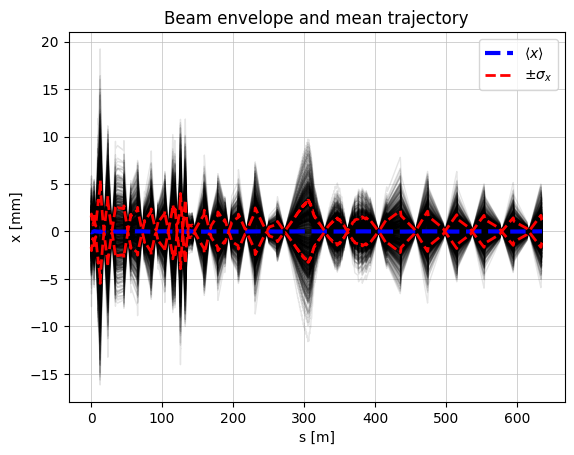

In [10]:
# --- Track step-by-step through the lattice ---
s_positions = []
x_positions = np.zeros((nparticles, len(lat.sequence)+1))
xp_positions = np.zeros((nparticles, len(lat.sequence)+1))

# initial
x_positions[:, 0] = p_array.rparticles[0, :]
xp_positions[:, 0] = p_array.rparticles[1, :]
s_positions.append(0)

p_temp = p_array.copy()

for i, elem in enumerate(lat.sequence):
    _, p_temp = track(MagneticLattice([elem]), p_temp)
    s_positions.append(s_positions[-1] + elem.l)
    x_positions[:, i+1] = p_temp.rparticles[0, :]
    xp_positions[:, i+1] = p_temp.rparticles[1, :]

s_positions = np.array(s_positions)

# --- Compute mean and std over all particles ---
mean_x = np.mean(x_positions, axis=0)
sigma_x = np.std(x_positions, axis=0)

# --- Plotting ---

# Single particle trajectories (gray)
for i in range(nparticles):
    plt.plot(s_positions, x_positions[i,:]*1e3, color='black', lw=1, alpha=0.1)

# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='red', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='red', lw=2)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()

finding trajectory...
z = 634.9428243991842 / 634.9428243991842. Applied:  

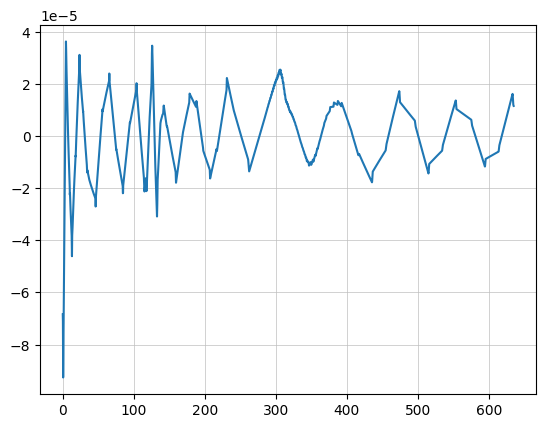

In [11]:
# Create the Navigator
navi = Navigator(lat)
navi.unit_step = 0.1  # high-resolution steps


# Track
p_no = deepcopy(p_array)
print("finding trajectory...")
start = time.time()
tws_no, p_no = track(lat, p_no, navi)

x_traj = np.array([t.x for t in tws_no])
y_traj = np.array([t.y for t in tws_no])
s_traj = np.array([t.s for t in tws_no])

plt.plot(s_traj,x_traj)

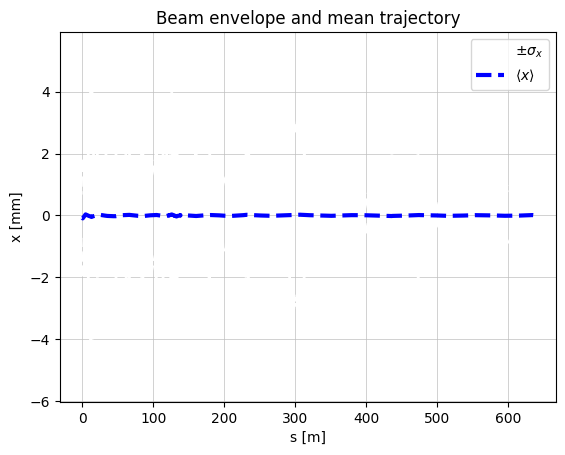

In [12]:
# Mean trajectory (blue)

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '--', color='white', lw=2, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '--', color='white', lw=2)


plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
for elem in lat.sequence:
    if isinstance(elem, Quadrupole):
        print(f"{elem.id}: dx={elem.dx:.3e}, dy={elem.dy:.3e}")


PDA1M: dx=0.000e+00, dy=0.000e+00
PFA1M: dx=0.000e+00, dy=0.000e+00
PDA21: dx=0.000e+00, dy=0.000e+00
PFA21: dx=0.000e+00, dy=0.000e+00
QDA23: dx=0.000e+00, dy=0.000e+00
QFA23: dx=0.000e+00, dy=0.000e+00
QDA23: dx=0.000e+00, dy=0.000e+00
QDA24: dx=0.000e+00, dy=0.000e+00
QFA24: dx=0.000e+00, dy=0.000e+00
QDA24: dx=0.000e+00, dy=0.000e+00
QDA32: dx=0.000e+00, dy=0.000e+00
QFA32: dx=0.000e+00, dy=0.000e+00
QDA32: dx=0.000e+00, dy=0.000e+00
QDA34: dx=0.000e+00, dy=0.000e+00
QFA34: dx=0.000e+00, dy=0.000e+00
QDA34: dx=0.000e+00, dy=0.000e+00
QDA42: dx=0.000e+00, dy=0.000e+00
QFA42: dx=0.000e+00, dy=0.000e+00
QDA42: dx=0.000e+00, dy=0.000e+00
QDA44: dx=0.000e+00, dy=0.000e+00
QFA44: dx=0.000e+00, dy=0.000e+00
QDA44: dx=0.000e+00, dy=0.000e+00
QDB14: dx=0.000e+00, dy=0.000e+00
QFB14: dx=0.000e+00, dy=0.000e+00
QDB14: dx=0.000e+00, dy=0.000e+00
QDB24: dx=0.000e+00, dy=0.000e+00
QFB24: dx=0.000e+00, dy=0.000e+00
QDB24: dx=0.000e+00, dy=0.000e+00
QDB34: dx=0.000e+00, dy=0.000e+00
QFB34: dx=0.00

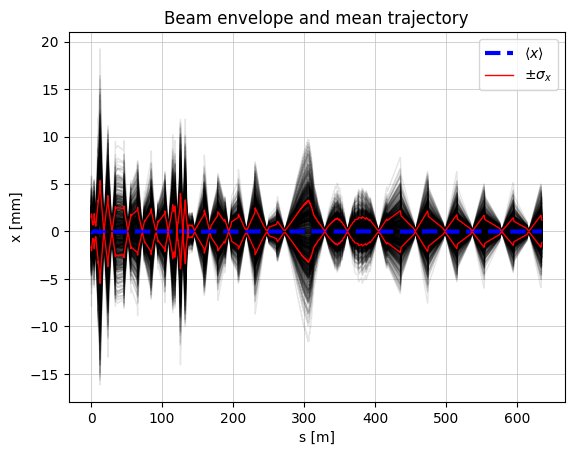

In [20]:
# --- Plotting ---

# Single particle trajectories (gray)
for i in range(nparticles):
    plt.plot(s_positions, x_positions[i,:]*1e3, color='black', lw=1, alpha=0.1)

# Mean trajectory (blue)
plt.plot(s_positions, mean_x*1e3, '--', color='blue', lw=3, label=r'$\langle x \rangle$')

# 1-sigma envelope (red)
plt.plot(s_positions, (mean_x+sigma_x)*1e3, '-', color='red', lw=1, label=r'$\pm \sigma_x$')
plt.plot(s_positions, (mean_x-sigma_x)*1e3, '-', color='red', lw=1)

# plt.ylim(-0.5,0.5)
# plt.xlim(0,620)

plt.xlabel("s [m]")
plt.ylabel("x [mm]")
plt.title("Beam envelope and mean trajectory")
plt.legend()
plt.grid(True)
plt.show()